In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
os.sys.path.append(os.path.join(os.path.abspath('.'), '..'))

In [10]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import time

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from trainer.predict import Predictor
from trainer.utils.util import *
from trainer.names import GRID_DIM

plt.rcParams["font.size"] = 16

In [11]:
# learning rate
PATH_JOBS = dict()

PATH_JOBS['0.0001'] = os.path.join(
    '..',
    'output',
    'learning_rate',
    '1.0',
    '0.0001',  # '0.0001', '0.001'
    'simple',
    'boundary',
    'filter_16',
    'kernel_7',
    'cnn_20191108_155939'  # 'cnn_20191108_155939', 'cnn_20191108_154453'
)

PATH_JOBS['0.001'] = os.path.join(
    '..',
    'output',
    'learning_rate',
    '1.0',
    '0.001',  # '0.0001', '0.001'
    'simple',
    'boundary',
    'filter_16',
    'kernel_7',
    'cnn_20191108_154453'  # 'cnn_20191108_155939', 'cnn_20191108_154453'
)

PATH_JOBS['all_fields'] = os.path.join(
    '..',
    'output',
    'feature',
    '1.0',
    '0.001', 
    'simple',
    'boundary_edge_surface',
    'filter_16',
    'kernel_7',
    'cnn_20191108_170546'  
)

PATH_JOBS['deeper'] = os.path.join(
    '..',
    'output',
    'depth_size',
    '1.0',
    '0.001', 
    'simple',
    'boundary_edge_surface',
    'filter_32_64',
    'kernel_7',
    'cnn_20191124_110537'  
)

PATH_JOBS['data'] = os.path.join(
    '..',
    'output',
    'data_percentage',
    '0.25',
    '0.001', 
    'simple',
    'boundary_edge_surface',
    'filter_32_64',
    'kernel_7',
    'cnn_20191124_162903'  
)

In [12]:
PATH_DATA_RAW = os.path.join('..', 'data', 'raw')

In [13]:
def get_path_data(path_job):
    return os.path.join(
        '..',
        'data',
        'processed',
        f'{path_job.split(os.path.sep)[-4]}_1.0'
    )

get_path_data(PATH_JOBS['all_fields'])

'../data/processed/boundary_edge_surface_1.0'

In [14]:
def get_path_model(path_job):
    return os.path.join(path_job, 'model.h5')

get_path_model(PATH_JOBS['all_fields'])

'../output/feature/1.0/0.001/simple/boundary_edge_surface/filter_16/kernel_7/cnn_20191108_170546/model.h5'

In [24]:
def make_predictor(job_name):
    return Predictor(
        path_model=get_path_model(PATH_JOBS[job_name]),
        path_stats=get_path_data(PATH_JOBS[job_name]),
        preprocess_path=os.path.join(PATH_JOBS[job_name], 'pp.pickle')
    )

In [25]:
os.path.join(PATH_JOBS['0.001'], 'pp.pickle')

'../output/learning_rate/1.0/0.001/simple/boundary/filter_16/kernel_7/cnn_20191108_154453/pp.pickle'

In [26]:
def get_grid(pp):
    grid_x = pp.grid['grid'][:, 0].reshape((GRID_DIM.y, GRID_DIM.x))
    grid_y = pp.grid['grid'][:, 1].reshape((GRID_DIM.y, GRID_DIM.x))
    return grid_x, grid_y

In [27]:
def get_mesh_vtu_for(job_name):
    names = read_json(os.path.join(get_path_data(PATH_JOBS[job_name]), 'names.json'))
    names = names['test']
    
    paths_mesh = {name: os.path.join(PATH_DATA_RAW, 'mesh', name + '.mesh') for name in names}
    paths_vtu = {name: os.path.join(PATH_DATA_RAW, 'vtu', name + '.vtu') for name in names}
    
    return paths_mesh, paths_vtu, names

In [28]:
def batch_predict(job_name, pre_mode='test'):
    predict = make_predictor(job_name)
    paths_mesh, paths_vtu, names = get_mesh_vtu_for(job_name)

    time_start = time.time()
    fields_geom, fields_sol, sig_vm, i_m, c, pp = predict(names, paths_mesh, paths_vtu, pre_mode)
    time_end = time.time()
    print(f'Execution time per specimen: {(time_end - time_start)/len(names)} seconds')

    grid_x, grid_y = get_grid(pp)
    
    results = {
        'fields_geom': fields_geom, 
        'fields_sol': fields_sol, 
        'sig_vm': sig_vm, 
        'i_m': i_m, 
        'c': c,
        'names': names,
        'grids': (grid_x, grid_y)
    }
    
    return results

In [29]:
results = {}

In [30]:
results['0.001'] = batch_predict('0.001')

reading file: (9) Rc_1.0_h_30.5_tac_10.0_tel_16.6


 20%|██        | 2/10 [00:00<00:00, 18.13it/s]

[INFO] encoding geometry ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating features ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating solutions ...


100%|██████████| 10/10 [00:28<00:00,  2.83s/it]


Execution time per specimen: 15.43305447101593 seconds


In [32]:
results['0.0001'] = batch_predict('0.0001')

reading file: (9) Rc_1.0_h_30.5_tac_10.0_tel_16.6


 20%|██        | 2/10 [00:00<00:00, 19.60it/s]

[INFO] encoding geometry ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating features ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating solutions ...


100%|██████████| 10/10 [00:26<00:00,  2.69s/it]


Execution time per specimen: 14.586046433448791 seconds


In [33]:
results['all_fields'] = batch_predict('all_fields')

reading file: (9) Rc_1.0_h_30.5_tac_10.0_tel_16.6


 20%|██        | 2/10 [00:00<00:00, 14.45it/s]

[INFO] encoding geometry ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating features ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating solutions ...


100%|██████████| 10/10 [00:31<00:00,  3.11s/it]


Execution time per specimen: 18.354527091979982 seconds


In [34]:
results['deeper'] = batch_predict('deeper')

reading file: (9) Rc_1.0_h_30.5_tac_10.0_tel_16.6


 20%|██        | 2/10 [00:00<00:00, 15.26it/s]

[INFO] encoding geometry ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating features ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating solutions ...


100%|██████████| 10/10 [00:31<00:00,  3.14s/it]


Execution time per specimen: 18.633940625190736 seconds


In [35]:
results['data'] = batch_predict('data')

reading file: (9) Rc_1.0_h_30.5_tac_10.0_tel_16.6


 20%|██        | 2/10 [00:00<00:00, 15.40it/s]

[INFO] encoding geometry ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating features ...


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] interpolating solutions ...


100%|██████████| 10/10 [00:32<00:00,  3.22s/it]


Execution time per specimen: 17.712181425094606 seconds


# plot

In [36]:
field_map = {
    'sig_vm': '$\sigma_{vm}$',
    'c': '$c$',
    'i_m': '$i_m$'
}

/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


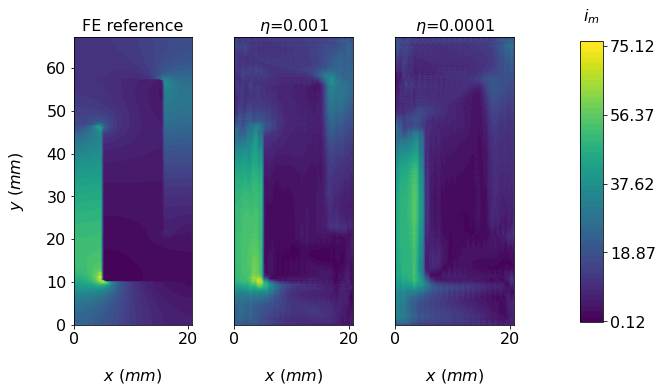

In [44]:
case_idx = 0
field_name = 'i_m'

result_one = results['0.001']
result_two = results['0.0001']

name_one = '$\eta$=0.001'
name_two = '$\eta$=0.0001'



mask = result_one['fields_geom']['mask'][case_idx, :, :, 0]

h_size = mask.sum(axis=1)[0].astype(int)
v_size = mask.sum(axis=0)[0].astype(int)

prediction_two = result_two[field_name]['pred'][case_idx][:v_size, :h_size]
prediction_one = result_one[field_name]['pred'][case_idx][:v_size, :h_size]
target = result_one[field_name]['y'][case_idx][:v_size, :h_size]
grid_x = result_one['grids'][0][:v_size, :h_size]
grid_y = result_one['grids'][1][:v_size, :h_size]


fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(8, 6))
im0 = ax0.contourf(grid_x, grid_y, target, 50, vmin=target.min(), vmax=target.max())
ax1.contourf(grid_x, grid_y, prediction_one, 50, vmin=target.min(), vmax=target.max())
ax2.contourf(grid_x, grid_y, prediction_two, 50, vmin=target.min(), vmax=target.max())

ax0.set_title('FE reference', fontsize=16)
ax1.set_title(name_one, fontsize=16)
ax2.set_title(name_two, fontsize=16)

ax0.set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
ax0.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
ax1.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
ax2.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)

ax1.set_yticklabels([])
ax1.set_yticks([])
ax2.set_yticklabels([])
ax2.set_yticks([])

cbar_ax = fig.add_axes([1.05, 0.22, 0.04, 0.65])
cbar_ax.set_xlabel(field_map[field_name], rotation=0, labelpad=20, fontsize=16)
cbar_ax.xaxis.set_label_position('top') 

ticks = [v for v in np.linspace(target.min(), target.max(), 5)]

plt.colorbar(im0, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=2)

fig.savefig('./result_lr.pdf', fomat='pdf', bbox_inches='tight')

/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


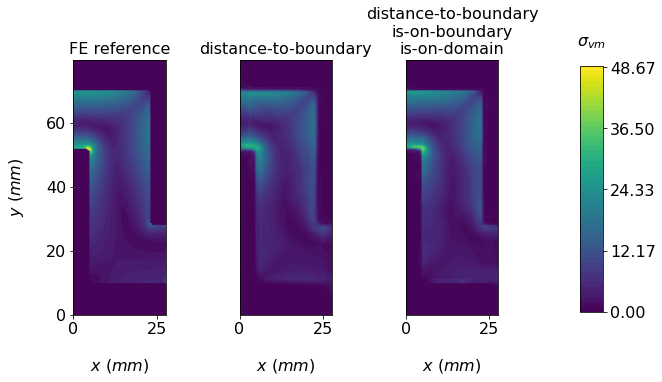

In [51]:
case_idx = 1
field_name = 'sig_vm'

result_one = results['0.001']
result_two = results['all_fields']

name_one = 'distance-to-boundary'
name_two = 'distance-to-boundary\nis-on-boundary\nis-on-domain'



mask = result_one['fields_geom']['mask'][case_idx, :, :, 0]

h_size = mask.sum(axis=1)[0].astype(int)
v_size = mask.sum(axis=0)[0].astype(int)

prediction_two = result_two[field_name]['pred'][case_idx][:v_size, :h_size]
prediction_one = result_one[field_name]['pred'][case_idx][:v_size, :h_size]
target = result_one[field_name]['y'][case_idx][:v_size, :h_size]
grid_x = result_one['grids'][0][:v_size, :h_size]
grid_y = result_one['grids'][1][:v_size, :h_size]


fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(8, 6))
im0 = ax0.contourf(grid_x, grid_y, target, 50, vmin=target.min(), vmax=target.max())
ax1.contourf(grid_x, grid_y, prediction_one, 50, vmin=target.min(), vmax=target.max())
ax2.contourf(grid_x, grid_y, prediction_two, 50, vmin=target.min(), vmax=target.max())

ax0.set_title('FE reference', fontsize=16)
ax1.set_title(name_one, fontsize=16)
ax2.set_title(name_two, fontsize=16)

ax0.set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
ax0.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
ax1.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
ax2.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)

ax1.set_yticklabels([])
ax1.set_yticks([])
ax2.set_yticklabels([])
ax2.set_yticks([])

cbar_ax = fig.add_axes([1.05, 0.22, 0.04, 0.57])
cbar_ax.set_xlabel(field_map[field_name], rotation=0, labelpad=20, fontsize=16)
cbar_ax.xaxis.set_label_position('top') 

ticks = [v for v in np.linspace(target.min(), target.max(), 5)]

plt.colorbar(im0, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=2)

fig.savefig('./result_feature.pdf', fomat='pdf', bbox_inches='tight')

In [18]:
mask[mask==1]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

/home/fghavamian/.virtualenvs/env_ds/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


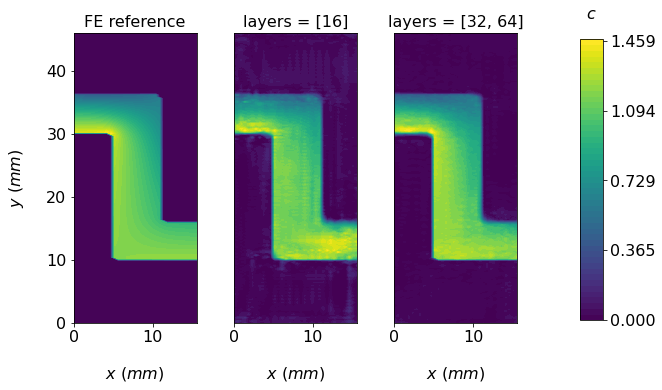

In [57]:
case_idx = 5
field_name = 'c'

result_one = results['all_fields']
result_two = results['deeper']

name_one = 'layers = [16]'
name_two = 'layers = [32, 64]'



mask = result_one['fields_geom']['mask'][case_idx, :, :, 0]

h_size = mask.sum(axis=1)[0].astype(int)
v_size = mask.sum(axis=0)[0].astype(int)

prediction_two = result_two[field_name]['pred'][case_idx][:v_size, :h_size]
prediction_one = result_one[field_name]['pred'][case_idx][:v_size, :h_size]
target = result_one[field_name]['y'][case_idx][:v_size, :h_size]
grid_x = result_one['grids'][0][:v_size, :h_size]
grid_y = result_one['grids'][1][:v_size, :h_size]


fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(8, 6))
im0 = ax0.contourf(grid_x, grid_y, target, 50, vmin=target.min(), vmax=target.max())
ax1.contourf(grid_x, grid_y, prediction_one, 50, vmin=target.min(), vmax=target.max())
ax2.contourf(grid_x, grid_y, prediction_two, 50, vmin=target.min(), vmax=target.max())

ax0.set_ylabel('$y~(mm)$', rotation=90, labelpad=20)
ax0.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
ax1.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)
ax2.set_xlabel('$x~(mm)$', rotation=0, labelpad=20)

ax1.set_yticklabels([])
ax1.set_yticks([])
ax2.set_yticklabels([])
ax2.set_yticks([])

ax0.set_title('FE reference', fontsize=16)
ax1.set_title(name_one, fontsize=16)
ax2.set_title(name_two, fontsize=16)

cbar_ax = fig.add_axes([1.05, 0.22, 0.04, 0.65])
cbar_ax.set_xlabel(field_map[field_name], rotation=0, labelpad=20, fontsize=16)
cbar_ax.xaxis.set_label_position('top') 

ticks = [v for v in np.linspace(target.min(), target.max(), 5)]

plt.colorbar(im0, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=2)

fig.savefig('./result_depth.pdf', fomat='pdf', bbox_inches='tight')

C:\Users\farig\Anaconda3\envs\lens3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


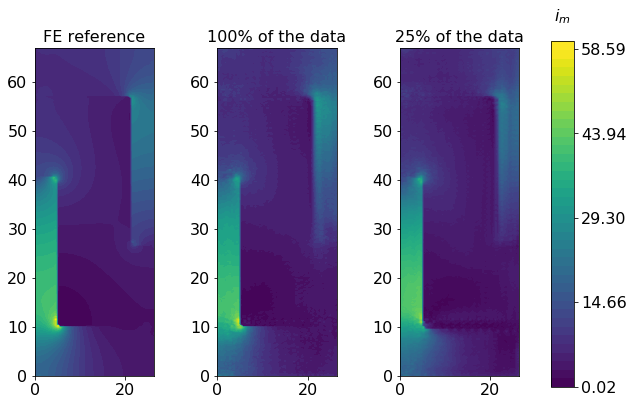

In [41]:
case_idx = 9
field_name = 'i_m'

result_one = results['deeper']
result_two = results['data']

name_one = '100% of the data'
name_two = '25% of the data'



mask = result_one['fields_geom']['mask'][case_idx, :, :, 0]

h_size = mask.sum(axis=1)[0].astype(int)
v_size = mask.sum(axis=0)[0].astype(int)

prediction_two = result_two[field_name]['pred'][case_idx][:v_size, :h_size]
prediction_one = result_one[field_name]['pred'][case_idx][:v_size, :h_size]
target = result_one[field_name]['y'][case_idx][:v_size, :h_size]
grid_x = result_one['grids'][0][:v_size, :h_size]
grid_y = result_one['grids'][1][:v_size, :h_size]


fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(8, 6))
im0 = ax0.contourf(grid_x, grid_y, target, 50, vmin=target.min(), vmax=target.max())
ax1.contourf(grid_x, grid_y, prediction_one, 50, vmin=target.min(), vmax=target.max())
ax2.contourf(grid_x, grid_y, prediction_two, 50, vmin=target.min(), vmax=target.max())

ax0.set_title('FE reference', fontsize=16)
ax1.set_title(name_one, fontsize=16)
ax2.set_title(name_two, fontsize=16)

cbar_ax = fig.add_axes([1.0, 0.1, 0.04, 0.8])
cbar_ax.set_xlabel(field_map[field_name], rotation=0, labelpad=20, fontsize=16)
cbar_ax.xaxis.set_label_position('top') 

ticks = [v for v in np.linspace(target.min(), target.max(), 5)]

plt.colorbar(im0, cax=cbar_ax, ticks=ticks)

plt.tight_layout(pad=2)

fig.savefig('./result_depth.pdf', fomat='pdf', bbox_inches='tight')